<a href="https://colab.research.google.com/github/sahilahmed21/AITripPlanner/blob/main/GoogleQuantumOptimiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip uninstall -y tensorflow tensorflow-quantum cirq


Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: tensorflow-quantum 0.7.3
Uninstalling tensorflow-quantum-0.7.3:
  Successfully uninstalled tensorflow-quantum-0.7.3
Found existing installation: cirq 1.3.0
Uninstalling cirq-1.3.0:
  Successfully uninstalled cirq-1.3.0


In [1]:
# Uninstall conflicting packages
!pip uninstall -y tensorflow tensorflow-quantum cirq tensorstore tensorflow-decision-forests tf-keras ydf jax grpcio-status

# Install compatible versions
!pip install tensorflow==2.15.0
!pip install tensorflow-quantum==0.7.3
!pip install cirq==1.3.0
!pip install numpy==1.26.4 pandas yfinance
!pip install protobuf==4.25.8 ml-dtypes==0.2.0  # Pin versions to avoid conflicts

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: tensorstore 0.1.74
Uninstalling tensorstore-0.1.74:
  Successfully uninstalled tensorstore-0.1.74
Found existing installation: tensorflow_decision_forests 1.11.0
Uninstalling tensorflow_decision_forests-1.11.0:
  Successfully uninstalled tensorflow_decision_forests-1.11.0
Found existing installation: tf_keras 2.18.0
Uninstalling tf_keras-2.18.0:
  Successfully uninstalled tf_keras-2.18.0
Found existing installation: ydf 0.12.0
Uninstalling ydf-0.12.0:
  Successfully uninstalled ydf-0.12.0
Found existing installation: jax 0.5.2
Uninstalling jax-0.5.2:
  Successfully uninstalled jax-0.5.2
Found existing installation: grpcio-status 1.71.0
Uninstalling grpcio-status-1.71.0:
  Successfully uninstalled grpcio-status-1.71.0
  Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
Using cach

  Using cached cirq-1.3.0-py3-none-any.whl.metadata (7.5 kB)
Using cached cirq-1.3.0-py3-none-any.whl (8.1 kB)
  Using cached protobuf-4.25.8-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
Using cached protobuf-4.25.8-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbax-checkpoint 0.11.16 requires jax>=0.5.0, which is not installed.
orbax-checkpoint 0.11.16 requires tensorstore>=0.1.71, which is not installed.
flax 0.10.6 requires jax>=0.5.1, which is not installed.
flax 0.10.6 requires tensorstore, which is not installed.
tensorflow-hub 0.16.1 requires tf-keras>=2.14.1, which is not installed.
dopamine-rl 4.1.2 requires jax>=0.1.72, which is not i

In [1]:
!pip install  numpy pandas yfinance


INFO: pip is looking at multiple versions of tensorflow-quantum to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of qcs-api-client to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of qcs-api-client to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abor

In [10]:
import numpy as np
import pandas as pd
import cirq
import tensorflow as tf
import tensorflow_quantum as tfq
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import warnings
warnings.filterwarnings("ignore")

print("TensorFlow version:", tf.__version__)
print("TensorFlow Quantum version:", tfq.__version__)
print("Cirq version:", cirq.__version__)


TensorFlow version: 2.15.0
TensorFlow Quantum version: 0.7.2
Cirq version: 1.3.0


In [3]:
num_assets = 4
stocks = [f"Stock {i+1}" for i in range(num_assets)]
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)

# For reproducibility
np.random.seed(1234)

# Simulate returns and covariance (simple example)
mu = np.random.rand(num_assets) * 0.1  # Expected returns
sigma = np.random.rand(num_assets, num_assets)
sigma = sigma @ sigma.T  # Make positive definite

print("Simulated Tickers:", stocks)
print("\nSimulated Expected Returns (mu):")
print(mu)
print("\nSimulated Covariance Matrix (sigma):")
print(sigma)


Simulated Tickers: ['Stock 1', 'Stock 2', 'Stock 3', 'Stock 4']

Simulated Expected Returns (mu):
[0.01915195 0.06221088 0.04377277 0.07853586]

Simulated Covariance Matrix (sigma):
[[1.40210046 1.48675601 1.27973056 1.31757023]
 [1.48675601 2.06431832 1.69277037 1.21281366]
 [1.27973056 1.69277037 1.42709254 1.13512601]
 [1.31757023 1.21281366 1.13512601 1.6295987 ]]


In [12]:
num_assets_classical = 4
num_assets_quantum = 2  # Reduced for quantum simulation
stocks = [f"Stock {i+1}" for i in range(num_assets_classical)]
np.random.seed(1234)

# Simulate returns and covariance
mu = np.random.uniform(0, 0.1, num_assets_classical)  # Expected returns (0-10%)
sigma = np.random.rand(num_assets_classical, num_assets_classical)
sigma = sigma @ sigma.T  # Positive definite covariance matrix
# Subset for quantum (first 2 assets)
mu_quantum = mu[:2]
sigma_quantum = sigma[:2, :2]

print("\nSimulated Tickers (Classical):", stocks)
print("Simulated Expected Returns (mu, Classical):", mu)
print("Simulated Covariance Matrix (sigma, Classical):", sigma)
print("\nSimulated Tickers (Quantum):", stocks[:2])
print("Simulated Expected Returns (mu, Quantum):", mu_quantum)
print("Simulated Covariance Matrix (sigma, Quantum):", sigma_quantum)

# Optional: Real data (uncomment to use)
"""
import yfinance as yf
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN"]
data = yf.download(tickers, start="2023-01-01", end="2023-12-31")["Adj Close"]
returns = data.pct_change().dropna()
mu = returns.mean().values * 252  # Annualized returns
sigma = returns.cov().values * np.sqrt(252)  # Annualized covariance
mu_quantum = mu[:2]
sigma_quantum = sigma[:2, :2]
stocks = tickers
"""



Simulated Tickers (Classical): ['Stock 1', 'Stock 2', 'Stock 3', 'Stock 4']
Simulated Expected Returns (mu, Classical): [0.01915195 0.06221088 0.04377277 0.07853586]
Simulated Covariance Matrix (sigma, Classical): [[1.40210046 1.48675601 1.27973056 1.31757023]
 [1.48675601 2.06431832 1.69277037 1.21281366]
 [1.27973056 1.69277037 1.42709254 1.13512601]
 [1.31757023 1.21281366 1.13512601 1.6295987 ]]

Simulated Tickers (Quantum): ['Stock 1', 'Stock 2']
Simulated Expected Returns (mu, Quantum): [0.01915195 0.06221088]
Simulated Covariance Matrix (sigma, Quantum): [[1.40210046 1.48675601]
 [1.48675601 2.06431832]]


'\nimport yfinance as yf\ntickers = ["AAPL", "MSFT", "GOOGL", "AMZN"]\ndata = yf.download(tickers, start="2023-01-01", end="2023-12-31")["Adj Close"]\nreturns = data.pct_change().dropna()\nmu = returns.mean().values * 252  # Annualized returns\nsigma = returns.cov().values * np.sqrt(252)  # Annualized covariance\nmu_quantum = mu[:2]\nsigma_quantum = sigma[:2, :2]\nstocks = tickers\n'


Optimal Weights (Classical): [1.72597959e-01 8.41340886e-17 5.26026859e-01 3.01375182e-01]
Portfolio Return (Classical): 0.049999999998215354
Portfolio Risk (Classical): 1.1463057992244348


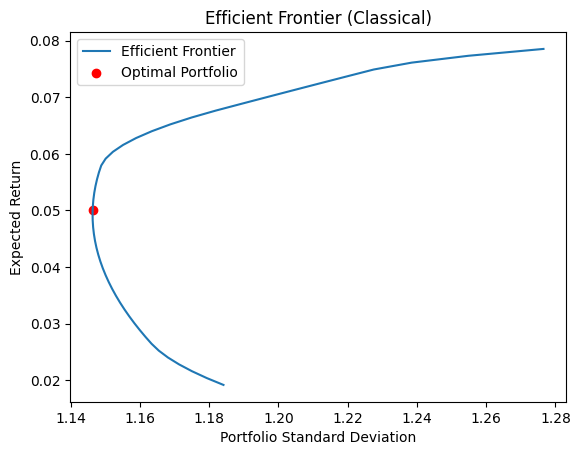

In [15]:
# Step 4: Classical Optimization
def portfolio_variance(w, sigma):
    return np.sqrt(w.T @ sigma @ w)

def optimize_portfolio(mu, sigma, target_return):
    n = len(mu)
    constraints = (
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
        {'type': 'eq', 'fun': lambda w: np.sum(w * mu) - target_return}
    )
    bounds = [(0, 1) for _ in range(n)]
    result = minimize(portfolio_variance, np.ones(n)/n, args=(sigma,),
                      constraints=constraints, bounds=bounds)
    return result.x if result.success else np.zeros(n)

target_return = 0.05
weights_classical = optimize_portfolio(mu, sigma, target_return)
print("\nOptimal Weights (Classical):", weights_classical)
print("Portfolio Return (Classical):", np.sum(weights_classical * mu))
print("Portfolio Risk (Classical):", portfolio_variance(weights_classical, sigma))

# Visualize Efficient Frontier
target_returns = np.linspace(min(mu), max(mu), 50)
variances = [portfolio_variance(optimize_portfolio(mu, sigma, r), sigma) for r in target_returns]
plt.plot(variances, target_returns, label='Efficient Frontier')
plt.scatter(portfolio_variance(weights_classical, sigma), target_return, color='red', label='Optimal Portfolio')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier (Classical)')
plt.legend()
plt.show()


In [17]:
# Step 5: Quantum Optimization (QAOA for 2 assets, binary weights)
# Simplified QUBO: Minimize w.T @ sigma @ w, w_i in {0, 1}, sum(w) = 1
# Use 2 qubits per asset to encode weights (e.g., w_i = 0 or 1)
num_qubits_per_asset = 2
total_qubits = num_qubits_per_asset * num_assets_quantum
qubits = [cirq.GridQubit(0, i) for i in range(total_qubits)]

# QUBO formulation
# Objective: Minimize variance (w.T @ sigma @ w)
# Constraint: sum(w) = 1 (enforced via penalty)
penalty = 10.0  # Penalty for sum(w) != 1
cost_hamiltonian = cirq.PauliSum()
# Variance terms (w_i * w_j * sigma_ij)
for i in range(num_assets_quantum):
    for j in range(num_assets_quantum):
        if i <= j:
            coeff = sigma_quantum[i, j] / 4  # Normalized for binary encoding
            qi = qubits[i * num_qubits_per_asset]
            qj = qubits[j * num_qubits_per_asset]
cost_hamiltonian += cirq.PauliString({qi: cirq.Z, qj: cirq.Z}) * coeff
# Constraint: (sum(w_i) - 1)^2
sum_z = sum(cirq.Z(qubits[i * num_qubits_per_asset]) for i in range(num_assets_quantum))
cost_hamiltonian += penalty * (sum_z - 1) ** 2

# QAOA Circuit (p=1 layer)
def create_qaoa_circuit(gamma, beta):
    circuit = cirq.Circuit()
    # Initial superposition
    for q in qubits:
        circuit.append(cirq.H(q))
    # Cost layer
    for term in cost_hamiltonian:
        if isinstance(term, cirq.PauliString):
            qubits_in_term = list(term.qubits)
            coeff = term.coefficient.real
            if len(qubits_in_term) == 1:
                circuit.append(cirq.rz(2 * gamma * coeff)(qubits_in_term[0]))
            elif len(qubits_in_term) == 2:
                circuit.append(cirq.ZZ(qubits_in_term[0], qubits_in_term[1])**(gamma * coeff / np.pi))
    # Mixing layer
    for q in qubits:
        circuit.append(cirq.rx(2 * beta)(q))
    return circuit


In [25]:
import sympy
import tensorflow as tf
import tensorflow_quantum as tfq

# Step 6: Optimize QAOA Parameters with TFQ
symbol_names = ['gamma', 'beta']
symbol_values = tf.Variable([0.5, 0.2], dtype=tf.float32)

# ✅ Use SymPy symbols to create a parameterized circuit
gamma_sym = sympy.Symbol('gamma')
beta_sym = sympy.Symbol('beta')
circuit = create_qaoa_circuit(gamma_sym, beta_sym)
circuit_tensor = tfq.convert_to_tensor([circuit])

expectation_layer = tfq.layers.Expectation()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)

@tf.function
def loss():
    return expectation_layer(
        circuit_tensor,
        operators=[cost_hamiltonian],
        symbol_names=symbol_names,
        symbol_values=[symbol_values]
    )

for _ in range(100):
    with tf.GradientTape() as tape:
        loss_value = loss()
    gradients = tape.gradient(loss_value, [symbol_values])
    optimizer.apply_gradients(zip(gradients, [symbol_values]))

print("\nOptimized QAOA Parameters:")
print("gamma =", symbol_values[0].numpy())
print("beta  =", symbol_values[1].numpy())



Optimized QAOA Parameters:
gamma = 0.49683324
beta  = 0.4884415


In [31]:
# Step 7: Simulate Optimized Circuit
optimized_circuit = create_qaoa_circuit(symbol_values[0].numpy(), symbol_values[1].numpy())
resolver = cirq.ParamResolver({'gamma': symbol_values[0].numpy(), 'beta': symbol_values[1].numpy()})
resolved_circuit = cirq.resolve_parameters(optimized_circuit, resolver)

# ✅ Properly append measurement
measured_circuit = resolved_circuit + cirq.Circuit(cirq.measure(*qubits, key='result'))

simulator = cirq.Simulator()
result = simulator.run(measured_circuit, repetitions=1000)
histogram = result.histogram(key='result')

print("\nQAOA Simulation Results (Top 5):", sorted(histogram.items(), key=lambda x: x[1], reverse=True)[:5])

# Interpret Results
def bitstring_to_weights(bitstring, num_assets):
    binary = format(bitstring, 'b')[-num_assets:]  # take last num_assets bits
    binary = binary.zfill(num_assets)  # ensure it's zero-padded
    weights = np.array([1 if bit == '1' else 0 for bit in binary])
    return weights / np.sum(weights) if np.sum(weights) > 0 else np.zeros(num_assets)

# Get most frequent bitstring
most_frequent = max(histogram, key=histogram.get)
weights_quantum = bitstring_to_weights(most_frequent, num_assets_quantum)
print("\nOptimal Weights (Quantum):", weights_quantum)
print("Portfolio Return (Quantum):", np.sum(weights_quantum * mu_quantum))
print("Portfolio Risk (Quantum):", portfolio_variance(weights_quantum, sigma_quantum))

# Compare Classical and Quantum
print("\nComparison:")
print(f"Classical Weights (first 2 assets): {weights_classical[:2]}")
print(f"Classical Return (first 2 assets): {np.sum(weights_classical[:2] * mu_quantum)}")
print(f"Classical Risk (first 2 assets): {portfolio_variance(weights_classical[:2], sigma_quantum)}")



QAOA Simulation Results (Top 5): [(1, 137), (4, 122), (5, 119), (0, 116), (7, 82)]

Optimal Weights (Quantum): [0. 1.]
Portfolio Return (Quantum): 0.06221087710398319
Portfolio Risk (Quantum): 1.4367735785996425

Comparison:
Classical Weights (first 2 assets): [1.72597959e-01 8.41340886e-17]
Classical Return (first 2 assets): 0.003305586626302582
Classical Risk (first 2 assets): 0.20437380114289083
